<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/Damped_sine_LSTM_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
  return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [3]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
  X, y = list(), list()
  for _ in range(n_patterns):
    p = randint(10, 20)
    d = uniform(0.01, 0.1)
    sequence = generate_sequence(length + output, p, d)
    X.append(sequence[:-output])
    y.append(sequence[-output:])
  X = array(X).reshape(n_patterns, length, 1)
  y = array(y).reshape(n_patterns, output)
  return X, y

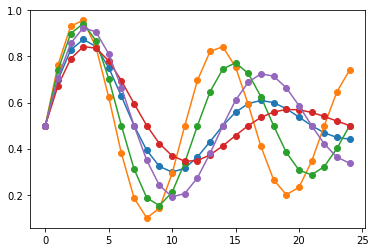

In [4]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
  plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]],'-o')
plt.show()

In [6]:
y

array([[0.53727176, 0.5       , 0.46874759, 0.44843261, 0.44111749],
       [0.23183933, 0.3447734 , 0.5       , 0.64723874, 0.74127202],
       [0.30717754, 0.28617433, 0.32216251, 0.40139577, 0.5       ],
       [0.56847991, 0.55728068, 0.53969241, 0.51944876, 0.5       ],
       [0.58714139, 0.5       , 0.42045505, 0.36305492, 0.3368452 ]])

# Predicción de una función seno amortiguada

In [18]:
# Generamos las secuencias a predicir
X, y = generate_examples(50, 10000, 10)

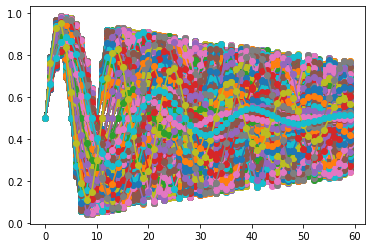

In [19]:
# Las visualizamos
for i in range(len(X)):
  plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]],'-o')
plt.show()

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [33]:
y.shape

(10000, 10)

In [34]:

modelo = Sequential()
modelo.add(LSTM(20, input_shape=(50, 1)))
modelo.add(Dense(1))
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [35]:
modelo.compile(optimizer='adam', loss='mae')

In [36]:
modelo.fit(X,y, batch_size=10, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 4s 3ms/step - loss: 0.0621
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0335
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0339
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0343
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0341


In [38]:
# Generamos las secuencias de test
X_test, y_test = generate_examples(50, 1000, 10)
loss = modelo.evaluate(X_test, y_test)
print(loss)

32/32 [==============================] - 0s 3ms/step - loss: 0.0306
0.030623963102698326


In [24]:
y_pred = modelo.predict(X_test)

In [25]:
y_pred

array([[0.51306343],
       [0.5115338 ],
       [0.49842018],
       [0.50076014],
       [0.49767363],
       [0.49794543],
       [0.4913683 ],
       [0.5062522 ],
       [0.50473654],
       [0.54165083],
       [0.50068736],
       [0.49679124],
       [0.48698646],
       [0.5539276 ],
       [0.550852  ],
       [0.5017247 ],
       [0.5078855 ],
       [0.50525826],
       [0.509848  ],
       [0.4643671 ],
       [0.518196  ],
       [0.5001794 ],
       [0.50858307],
       [0.51770616],
       [0.49835122],
       [0.54681695],
       [0.4858669 ],
       [0.5028107 ],
       [0.4988063 ],
       [0.5039852 ],
       [0.4403528 ],
       [0.44967872],
       [0.5044051 ],
       [0.55244213],
       [0.49995565],
       [0.48046184],
       [0.4945374 ],
       [0.49647486],
       [0.41215897],
       [0.5735924 ],
       [0.44661707],
       [0.50050807],
       [0.3833816 ],
       [0.49591208],
       [0.5021276 ],
       [0.51030815],
       [0.52178174],
       [0.510